Support Level of 5%: 

Confidence       count
(-0.001, 10.0]    0
(10.0, 20.0]      2
(20.0, 30.0]      1
(30.0, 40.0]      0
(40.0, 50.0]      0
(50.0, 60.0]      1
(60.0, 70.0]      0
(70.0, 80.0]      0
(80.0, 90.0]      0
(90.0, 100.0]     0
Name: confidence, dtype: int64


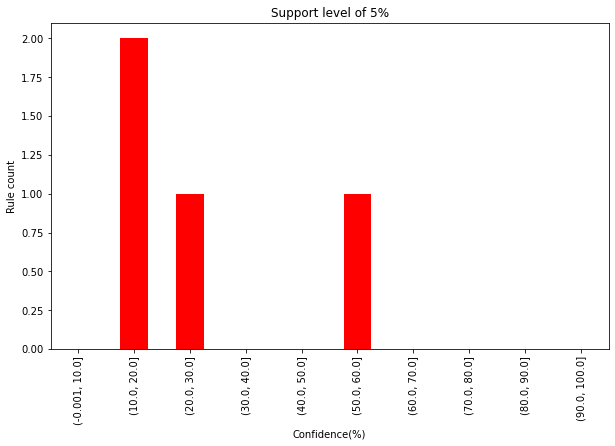

In [8]:
#Shubham Chand 180022
#Section B

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
plt.xlabel("Confidence(%)")
plt.ylabel("Rule count")
plt.title("Support level of 5%")
data = pd.read_csv("BreadBasket_DMS.csv") 

data= data.set_index(['Item'])
filtered= data.drop(['NONE'])
data= data.reset_index()
filtered= filtered.reset_index()
transaction_list = []

for i in filtered['Transaction'].unique():
    tlist = list(set(filtered[filtered['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)


te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)
############################################################
# Answer : 4

frequent_itemsets = apriori(df2, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.0001)
rules.sort_values('confidence', ascending=False)
rules['support']= rules['support']*100
rules['confidence']= rules['confidence']*100
rules2= rules[['antecedents','consequents', 'support', 'confidence']]
rules2.sort_values('confidence', ascending=False)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print("Support Level of 5%: \n")
print("Confidence       count")
print(rules2['confidence'].value_counts(bins=bins, sort=False))
rules2['confidence'].value_counts(bins=bins, sort=False).plot(kind='bar', color='red')
plt.show()



Support Level of 1%: 

Confidence       count
(-0.001, 10.0]    30
(10.0, 20.0]      14
(20.0, 30.0]      11
(30.0, 40.0]       3
(40.0, 50.0]       5
(50.0, 60.0]      10
(60.0, 70.0]       0
(70.0, 80.0]       1
(80.0, 90.0]       0
(90.0, 100.0]      0
Name: confidence, dtype: int64


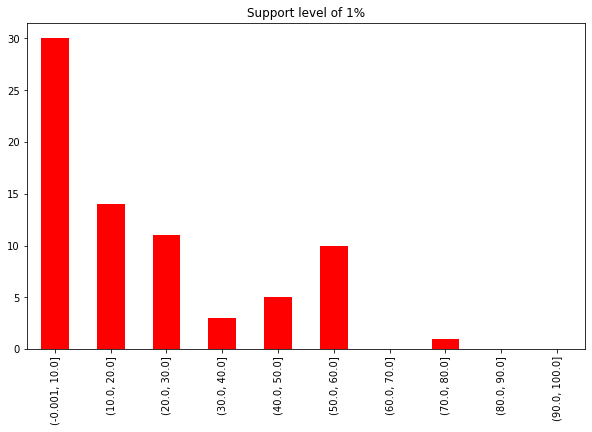

In [9]:
# Answer : 5

frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.0001)
rules.sort_values('confidence', ascending=False)
rules['support']= rules['support']*100
rules['confidence']= rules['confidence']*100
rules2= rules[['antecedents','consequents', 'support', 'confidence']]
rules2.sort_values('confidence', ascending=False)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print("Support Level of 1%: \n")
print("Confidence       count")
print(rules2['confidence'].value_counts(bins=bins, sort=False))
rules2['confidence'].value_counts(bins=bins, sort=False).plot(kind='bar', color='red')
plt.title("Support level of 1%")
plt.show()

Support Level of 0.5%: 

Confidence       count
(-0.001, 10.0]    92
(10.0, 20.0]      46
(20.0, 30.0]      21
(30.0, 40.0]      11
(40.0, 50.0]       7
(50.0, 60.0]      13
(60.0, 70.0]       2
(70.0, 80.0]       1
(80.0, 90.0]       1
(90.0, 100.0]      0
Name: confidence, dtype: int64


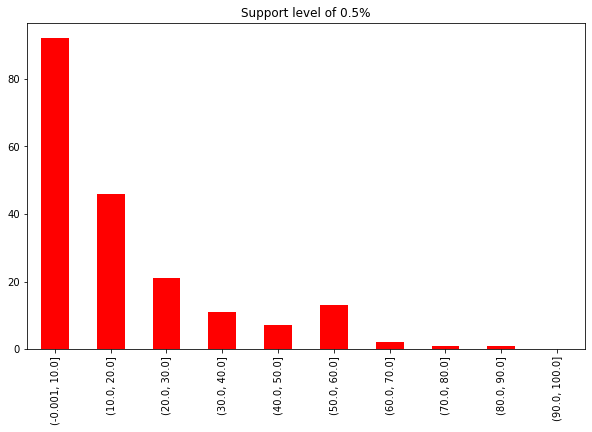

In [11]:
# Answer: 6

frequent_itemsets = apriori(df2, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.0001)
rules.sort_values('confidence', ascending=False)
rules['support']= rules['support']*100
rules['confidence']= rules['confidence']*100
rules2= rules[['antecedents','consequents', 'support', 'confidence']]
rules2.sort_values('confidence', ascending=False)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print("Support Level of 0.5%: \n")
print("Confidence       count")
print(rules2['confidence'].value_counts(bins=bins, sort=False))
rules2['confidence'].value_counts(bins=bins, sort=False).plot(kind='bar', color='red')
plt.title("Support level of 0.5%")
plt.show()

Rules:

   antecedents  consequents  antecedent support  consequent support   support  \
0  (Alfajores)      (Bread)            0.036344            0.327205  0.010354   
1      (Bread)  (Alfajores)            0.327205            0.036344  0.010354   
2  (Alfajores)     (Coffee)            0.036344            0.478394  0.019651   
3     (Coffee)  (Alfajores)            0.478394            0.036344  0.019651   
4      (Bread)    (Brownie)            0.327205            0.040042  0.010777   

   confidence      lift  leverage  conviction  
0    0.284884  0.870657 -0.001538    0.940818  
1    0.031644  0.870657 -0.001538    0.995145  
2    0.540698  1.130235  0.002264    1.135648  
3    0.041078  1.130235  0.002264    1.004936  
4    0.032935  0.822508 -0.002326    0.992651  


pairs with best confidence: 

         antecedents consequents   support  confidence      lift
40           (Toast)    (Coffee)  2.366614   70.440252  1.472431
39  (Spanish Brunch)    (Coffee)  1.088220   59.883721 

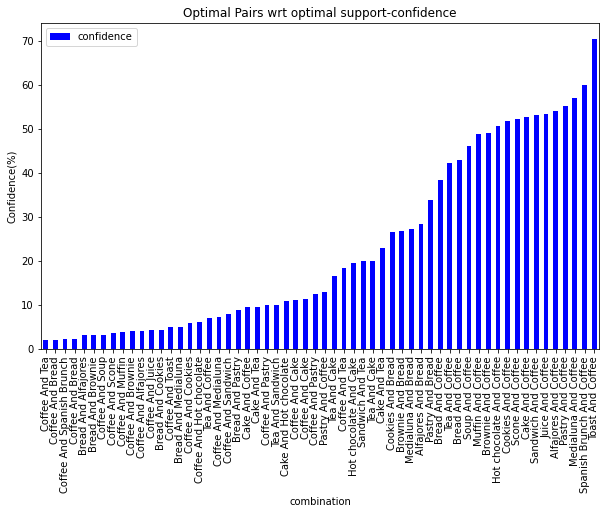

In [12]:
# Answer: 7

frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift')
rules.sort_values('confidence', ascending=False)
print("Rules:\n")
print(rules.head(5))
print("\n")
rules['support']= rules['support']*100
rules['confidence']= rules['confidence']*100
rules['lift']= rules['lift']
rules2= rules[['antecedents','consequents', 'support', 'confidence','lift']]
rules2= rules2.sort_values('confidence', ascending=False)
print("pairs with best confidence: \n")
print(rules2.head())
print("\n")
rules2= rules2.sort_values('support', ascending=False)
print("pairs with best support: \n")
print(rules2.head())
print("\n")
print("As We can see from the above tables, The best possible pairs would be Cake & Coffee, Paestry & Cake\n")
rules2= rules2.sort_values('confidence', ascending=False)
print("pairs with worst confidence: \n")
print(rules2.tail())
print("\n")
rules2= rules2.sort_values('lift', ascending=False)
print("pairs with best lift: \n")
print(rules2.head())
print("\n")
rules2= rules2.sort_values('lift', ascending=False)
print("pairs with worst lift: \n")
print(rules2.tail())
print("\n")
rules3=rules2.set_index('confidence')
rules4= rules3.sort_index()
finalrules=rules4.reset_index()
finalrules["antecedents"] = finalrules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
finalrules["consequents"] = finalrules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
finalrules['combination']= finalrules['antecedents']+" And " + finalrules['consequents']
finalrules= finalrules.drop_duplicates()
print("All the pairs with minimum support their confidence: \n")
finalrules.plot(x='combination', y= 'confidence',kind='bar', color='blue')
plt.rcParams["figure.figsize"] = [10, 6]
plt.ylabel("Confidence(%)")
plt.title("Optimal Pairs wrt optimal support-confidence")
plt.show()